In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [13]:
data = pd.read_csv("./daten/bank.csv", delimiter=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,no


In [14]:
data.shape

(4119, 15)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4119 non-null   int64 
 1   job          4119 non-null   object
 2   marital      4119 non-null   object
 3   education    4119 non-null   object
 4   default      4119 non-null   object
 5   housing      4119 non-null   object
 6   loan         4119 non-null   object
 7   contact      4119 non-null   object
 8   month        4119 non-null   object
 9   day_of_week  4119 non-null   object
 10  campaign     4119 non-null   int64 
 11  pdays        4119 non-null   int64 
 12  previous     4119 non-null   int64 
 13  poutcome     4119 non-null   object
 14  y            4119 non-null   object
dtypes: int64(4), object(11)
memory usage: 482.8+ KB


In [16]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

Data preprocessing

In [18]:
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

###sklearn OrdinalEncoder

In [19]:
ord_enc= OrdinalEncoder()
data_copy = data.copy()
for i in data_copy.columns:
    if(data_copy[i].dtype == 'object'):
        data_copy[i] = ord_enc.fit_transform(data_copy[[i]])

data_copy.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,30,1.0,1.0,2.0,0.0,2.0,0.0,0.0,6.0,0.0,2,999,0,1.0,0.0
1,39,7.0,2.0,3.0,0.0,0.0,0.0,1.0,6.0,0.0,4,999,0,1.0,0.0
2,25,7.0,1.0,3.0,0.0,2.0,0.0,1.0,4.0,4.0,1,999,0,1.0,0.0
3,38,7.0,1.0,2.0,0.0,1.0,1.0,1.0,4.0,0.0,3,999,0,1.0,0.0
4,47,0.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,1.0,1,999,0,1.0,0.0
5,32,7.0,2.0,6.0,0.0,0.0,0.0,0.0,9.0,2.0,3,999,2,0.0,0.0
6,32,0.0,2.0,6.0,0.0,2.0,0.0,0.0,9.0,1.0,4,999,0,1.0,0.0
7,41,2.0,1.0,6.0,1.0,2.0,0.0,0.0,7.0,1.0,2,999,0,1.0,0.0
8,31,7.0,0.0,5.0,0.0,0.0,0.0,0.0,7.0,3.0,1,999,1,0.0,0.0
9,35,1.0,1.0,2.0,1.0,0.0,0.0,1.0,6.0,2.0,1,999,0,1.0,0.0


In [51]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
# data_nomilize = preprocessing.normalize(data_copy)

In [ ]:
# df_scale = pd.DataFrame(data_nomilize, columns = data_copy.columns)

In [ ]:
# df_scale.head(10)

###RandomForest

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [22]:
X = data_copy.iloc[:,:-1]
y = data_copy.iloc[:,-1:]

In [23]:
X = preprocessing.normalize(X)

In [84]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [85]:
y_train.values.ravel() # type: ignore

array([0., 0., 1., ..., 1., 0., 1.])


Accuracy of the model based on accuracy of test set:  0.8951
Error of test set: 0.1049
Out of bag score (samples in training set): 0.8864
out-of-bag error (samples in training set): 0.1136
Accuracy of Training set: 0.9951
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       929
         1.0       0.42      0.18      0.25       101

    accuracy                           0.90      1030
   macro avg       0.67      0.58      0.60      1030
weighted avg       0.87      0.90      0.88      1030


Confusion Matrix: 
 [[904  25]
 [ 83  18]]

ROC AUC: 0.6800



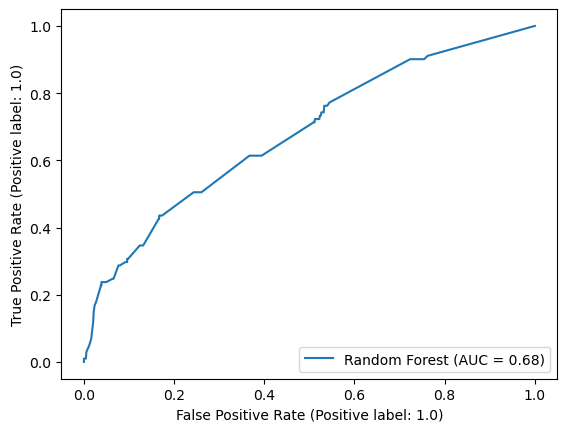

In [86]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 25, oob_score=True)

#Training the model on the training dataset
# with fit-Function to train the model using the training sets as parameters
clf.fit(X_train, y_train.values.ravel()) # type: ignore
#performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
print()
a = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the model based on accuracy of test set: {a: .4f}")
print(f"Error of test set: {1 - a:.4f}")
b = clf.oob_score_
print(f"Out of bag score (samples in training set): {b:.4f}")
print(f"out-of-bag error (samples in training set): {1 - b:.4f}")
print(f"Accuracy of Training set: {clf.score(X_train, y_train) :.4f}")
print("Classification Report: \n {}\n".format(metrics.classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred)))
print("ROC AUC: {0:.4f}\n".format(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))
RocCurveDisplay.from_estimator(clf, X_test, y_test, name="Random Forest")
plt.show()

1b) Random Forest nutzt Bootstrapping. Da das Bootstrapping die Daten mit der Möglichkeit abtastet, ein Sample mehrmals auszuwählen, ist es sehr wahrscheinlich dass nicht alle Samples  aus dem ursprünglichen Datensatz auswählen. Solche samples sind Out-of-bag-samples bezeichnet. Diese Strichproben landen in test set und werden verwendet, um die Leistung des Models zu messen.\
Out-of-bag-error := ist bei out-of-bag-samples erzielte Fehler. -> liefert zuverlässige Ergebnisse i.V.z. anderen Validierungstechniken wie train test -split or Kreuzvalidierung.


1c) Berechnung von MDI (Mean decrease impurity)

The Mean Decrease Accuracy:= plot expresses how much accuracy the model losses by excluding each variable. The more accuracy suffers, the more important the variable is for the successful classification. Teh variables are presented from decending importance.\
The mean decrease in Gini coefficient is a measure of thow each variable contributes to the homogeneity of the nodes and leaves in the resulting random forest. The higher the value of mean decrease accuracy or decrease GINI score, the higher the importance of the variable in the model.

In [27]:
import time

In [87]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time: .3f} seconds")

Elapsed time to compute the importances:  0.015 seconds


In [29]:
feature_names = data_copy.iloc[:,:-1].columns
feature_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [30]:
forest_importances = pd.Series(importances, index = feature_names)
forest_importances.sort_values(ascending=False)

pdays          0.158088
age            0.150870
month          0.130999
education      0.102911
campaign       0.088072
job            0.082845
day_of_week    0.079033
marital        0.046381
housing        0.039974
previous       0.034710
poutcome       0.034002
loan           0.022164
contact        0.018128
default        0.011823
dtype: float64

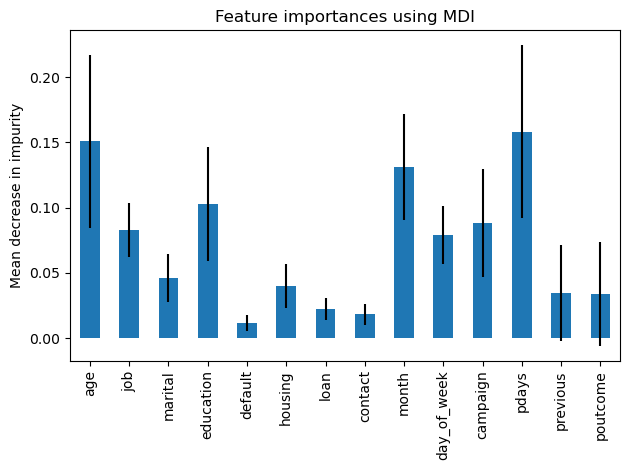

In [31]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [32]:
X_new = data_copy[['pdays', 'age', 'month', 'education', 'job', 'day_of_week', 'campaign']]

In [33]:
X_new = preprocessing.normalize(X_new)

In [88]:
#Split the data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size= 0.25, random_state=0)


Accuracy of the model based on accuracy of test set:  0.887378640776699
Error of test set:  0.11262135922330097
Out of bag score (samples in training set):  0.8821625121398511
out-of-bag error (samples in training set):  0.11783748786014892
Accuracy of Training set:  0.9922304953059242
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       929
         1.0       0.36      0.19      0.25       101

    accuracy                           0.89      1030
   macro avg       0.64      0.58      0.59      1030
weighted avg       0.86      0.89      0.87      1030


Confusion Matrix: 
 [[895  34]
 [ 82  19]]

ROC AUC: 0.6020



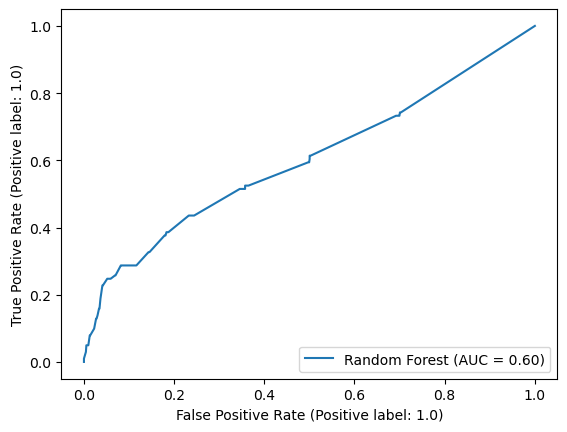

In [89]:
# creating a RF classifier
clf_new = RandomForestClassifier(n_estimators = 25, oob_score=True)

#Training the model on the training dataset
# with fit-Function to train the model using the training sets as parameters
clf_new.fit(X_train_new, y_train_new.values.ravel()) # type: ignore
#performing predictions on the test dataset
y_pred_new = clf_new.predict(X_test_new)

# metrics are used to find accuracy or error
print()
a_new = metrics.accuracy_score(y_test_new, y_pred_new)
print("Accuracy of the model based on accuracy of test set: ", a_new)
print("Error of test set: ", 1 - a_new)
b_new = clf_new.oob_score_
print("Out of bag score (samples in training set): ", b_new)
print("out-of-bag error (samples in training set): ", 1 - b_new)
print("Accuracy of Training set: ", clf_new.score(X_train_new, y_train_new))
print("Classification Report: \n {}\n".format(metrics.classification_report(y_test_new, y_pred_new)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test_new, y_pred_new)))
print("ROC AUC: {0:.4f}\n".format(roc_auc_score(y_test_new, clf_new.predict_proba(X_test_new)[:,1])))
RocCurveDisplay.from_estimator(clf_new, X_test_new, y_test_new, name="Random Forest")
plt.show()

1f) Beide Modelle ergeben sich fast ähnlichen Accuracy score sowie den AUC-Score. Daher wird nur 7 Attribute aus 15 Attributen benötigt, um das Modell zu erstellen. 

2a)

2b) prediction on all data

In [71]:
from sklearn.metrics import recall_score, precision_score

In [73]:
y_pred_all = clf_new.predict(X_new)
#print("Classification Report: \n {}\n".format(metrics.classification_report(y, y_pred_all)))
print('Recall: %.4f' % recall_score(y, y_pred_all))
print('Precision: %.4f' % precision_score(y, y_pred_all))


Recall: 0.7251
Precision: 0.8910


In [59]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve

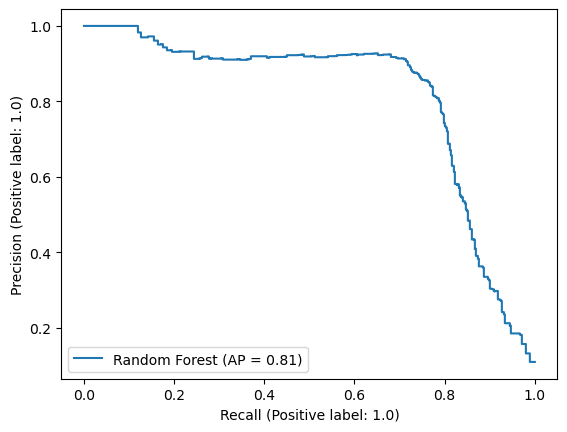

In [69]:
PrecisionRecallDisplay.from_estimator(clf_new, X_new, y, name = "Random Forest")

In [74]:
# FPR, TPR 
fpr, tpr, _ = roc_curve(y, y_pred_all)
fpr, tpr

(array([0.        , 0.01090513, 1.        ]),
 array([0.        , 0.72505543, 1.        ]))

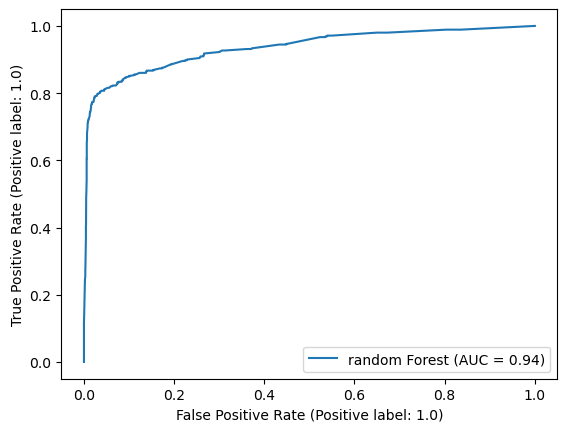

In [75]:
RocCurveDisplay.from_estimator(clf_new, X_new, y, name="random Forest")

True positive rate = recall\
hohe Precision -> wenige FPs -> niedrige False Positive Rate

2c) f1-score, matthews correlation coefficient

In [91]:
from sklearn.metrics import f1_score, matthews_corrcoef

In [92]:
print('f1-Score: %.4f' % f1_score(y, y_pred_all))
print('matthews correlation coefficient: %.4f' % matthews_corrcoef(y, y_pred_all))

f1-Score: 0.7995
matthews correlation coeficient: 0.7828
